In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import numpy as np

In [3]:
cab_data = pd.read_csv("Cab_Data.csv")
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [156]:
city = pd.read_csv("city.csv")
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
customer_id = pd.read_csv("Customer_Id.csv")
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
transaction_id = pd.read_csv("Transaction_Id.csv")
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [36]:
master = pd.DataFrame(cab_data)
master = pd.merge(master, transaction_id, on=['Transaction ID'])
master = pd.merge(master, city, on=['City'])
master = pd.merge(master, customer_id, on=['Customer ID'])

In [37]:
master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,"814,885","24,701",Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,"814,885","24,701",Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,"814,885","24,701",Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,"814,885","24,701",Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,"814,885","24,701",Male,27,9237


In [39]:
master.to_csv('master.csv')

<AxesSubplot:xlabel='Price Charged', ylabel='Company'>

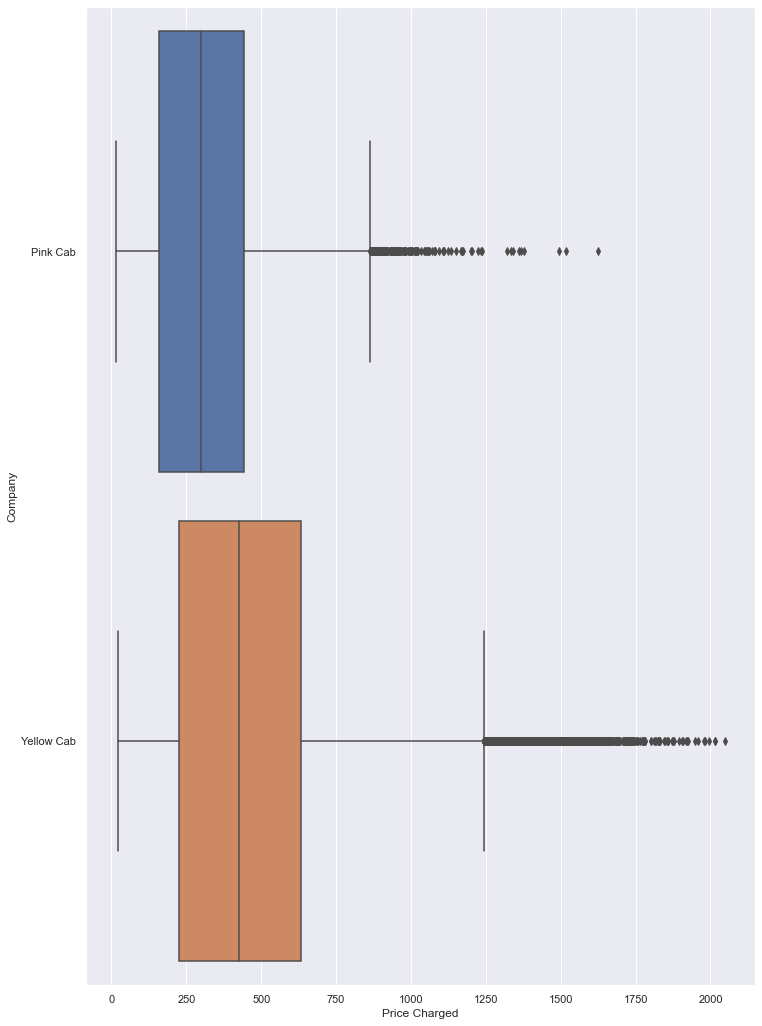

In [40]:
sns.set(rc={'figure.figsize':(12,18)})
sns.boxplot( y=cab_data["Company"], x=cab_data["Price Charged"], orient = 'h', width=.9)

# City Analysis

In [46]:
city = pd.read_csv("city.csv")
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [90]:
city.shape

(20, 4)

In [91]:
city.describe

<bound method NDFrame.describe of                 City  Population   Users  Non_Users
0        NEW YORK NY     8405837  302149    8103688
1         CHICAGO IL     1955130  164468    1790662
2     LOS ANGELES CA     1595037  144132    1450905
3           MIAMI FL     1339155   17675    1321480
4     SILICON VALLEY     1177609   27247    1150362
5      ORANGE COUNTY     1030185   12994    1017191
6       SAN DIEGO CA      959307   69995     889312
7         PHOENIX AZ      943999    6133     937866
8          DALLAS TX      942908   22157     920751
9         ATLANTA GA      814885   24701     790184
10         DENVER CO      754233   12421     741812
11         AUSTIN TX      698371   14978     683393
12        SEATTLE WA      671238   25063     646175
13         TUCSON AZ      631442    5712     625730
14  SAN FRANCISCO CA      629591  213609     415982
15     SACRAMENTO CA      545776    7044     538732
16     PITTSBURGH PA      542085    3643     538442
17     WASHINGTON DC      4188

In [50]:
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8')

population = []
for p in city['Population']:
    population.append(locale.atoi(p))
    
users = []
for u in city['Users']:
    users.append(locale.atoi(u))

non_users = np.subtract(population,users)

In [51]:
city_users = pd.DataFrame(city)
city_users['Population'] = population
city_users['Users'] = users
city_users['Non_Users'] = non_users
city_users

,City,Population,Users,Non_Users
0,NEW YORK NY,8405837,302149,8103688
1,CHICAGO IL,1955130,164468,1790662
2,LOS ANGELES CA,1595037,144132,1450905
3,MIAMI FL,1339155,17675,1321480
4,SILICON VALLEY,1177609,27247,1150362
5,ORANGE COUNTY,1030185,12994,1017191
6,SAN DIEGO CA,959307,69995,889312
7,PHOENIX AZ,943999,6133,937866
8,DALLAS TX,942908,22157,920751
9,ATLANTA GA,814885,24701,790184


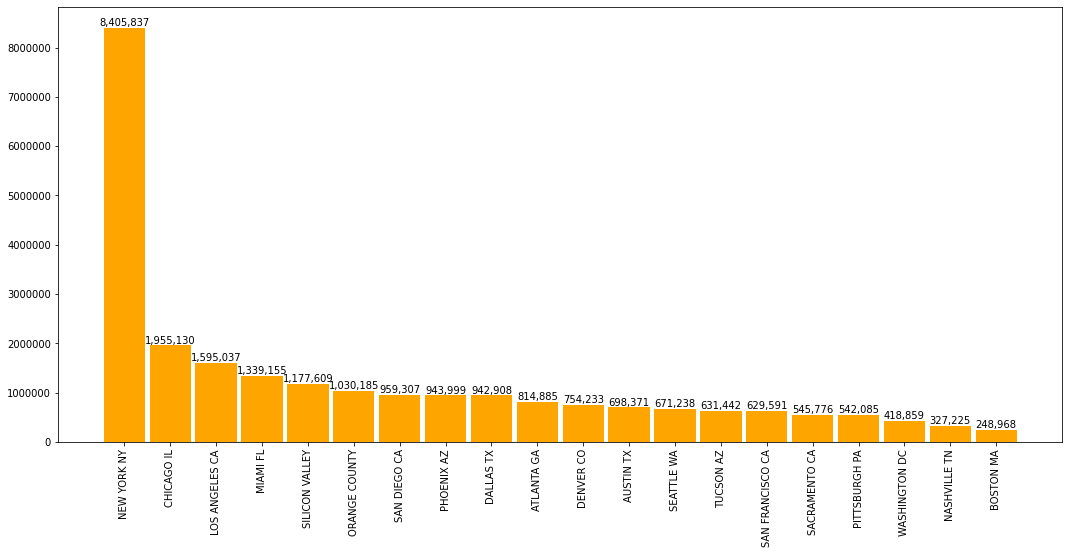

In [84]:
fig, ax = plt.subplots(figsize=(18, 8))
plt.ticklabel_format(style='plain') 
plt.bar(city_users['City'], city_users['Population'], .9, color="orange")

container = ax.containers[0]
ax.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])
plt.xticks(rotation = 90)
plt.show()

In [89]:
city_perc = pd.DataFrame(city_users)
city_perc.drop(['Population'], axis=1, inplace=True)
list(city_perc.columns)

['City', 'Users', 'Non_Users']